In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(80013493)
tf.set_random_seed(80013493)

In [0]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
#히든레이어를 하나 둠으로써 nn구성
#노드개수를 1024개로 설정
#input layer
num_units = 1024
x = tf.placeholder(tf.float32, [None, 784])
w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
L1 = tf.nn.relu(tf.matmul(x, w1) + b1)

#hidden layer
w2 = tf.Variable(tf.zeros([num_units, 10]))
b2 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(L1, w2) + b2)

In [0]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p)) # cross entropy
train_step = tf.train.AdamOptimizer().minimize(loss)#아담최적화 사용
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.InteractiveSession()#session과 다른점은 자기자신에 대한 세션도 생성한다는 것 => 매번 세션을 만들지 않아도 됨
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(2000):
  i += 1
  batch_xs, batch_ts = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict = {x:batch_xs, t:batch_ts})
  if i%100 == 0:
    loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x:mnist.test.images, t:mnist.test.labels})
    print('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val, acc_val))


Step: 100, Loss: 2821.239746, Accuracy: 0.920300
Step: 200, Loss: 2006.258301, Accuracy: 0.937400
Step: 300, Loss: 1865.397949, Accuracy: 0.947300
Step: 400, Loss: 1674.650024, Accuracy: 0.950700
Step: 500, Loss: 1537.932373, Accuracy: 0.954000
Step: 600, Loss: 1491.723633, Accuracy: 0.954500
Step: 700, Loss: 1316.039307, Accuracy: 0.959900
Step: 800, Loss: 1232.239014, Accuracy: 0.963700
Step: 900, Loss: 1242.367920, Accuracy: 0.962500
Step: 1000, Loss: 1188.441650, Accuracy: 0.964600
Step: 1100, Loss: 1037.179321, Accuracy: 0.968600
Step: 1200, Loss: 1052.732300, Accuracy: 0.969000
Step: 1300, Loss: 1111.539062, Accuracy: 0.967400
Step: 1400, Loss: 1011.491150, Accuracy: 0.970400
Step: 1500, Loss: 1101.135864, Accuracy: 0.966500
Step: 1600, Loss: 1092.348877, Accuracy: 0.968100
Step: 1700, Loss: 1117.346191, Accuracy: 0.968800
Step: 1800, Loss: 1059.370483, Accuracy: 0.969700
Step: 1900, Loss: 1034.524536, Accuracy: 0.969200
Step: 2000, Loss: 969.794434, Accuracy: 0.972700


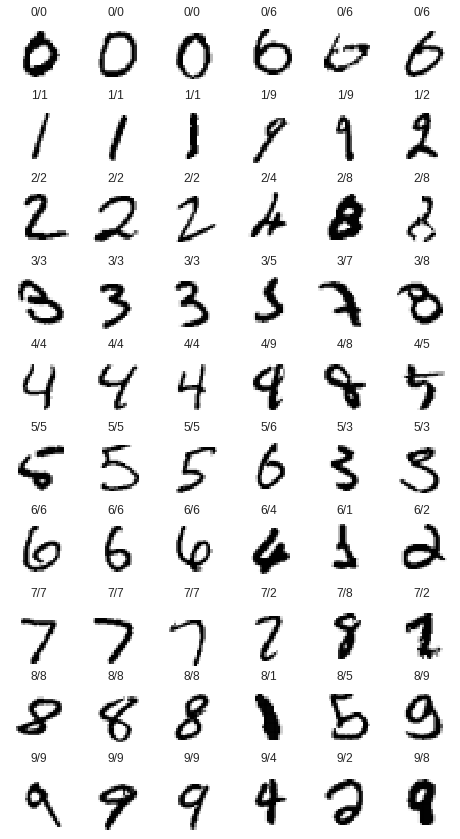

In [0]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
#맞는 것과 틀린 것 세개씩 출력
fig = plt.figure(figsize = (8,15))
for i in range(10):
  c = 1
  for(image, label, pred) in zip(images, labels, p_val):
    prediction, actual = np.argmax(pred), np.argmax(label)#actual : 실제값
    if prediction != i:
      continue
    if (c < 4 and i == actual) or (c >= 4 and i!= actual):
      subplot = fig.add_subplot(10, 6, i*6 +c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.set_title('%d/%d'%(prediction, actual))
      subplot.imshow(image.reshape((28,28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = "nearest")
      c += 1
      if c>6:
        break